In [3]:
from trainer import Trainer
import constants

import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [4]:
embeddings = {}
text_labels = []
raw_text_labels_files = []

for file_path in constants.file_paths:
    with open(file_path + "_embeddings_.json", "r") as f:
        embeddings_objects = json.load(f)
        for emb_obj in embeddings_objects:
            embeddings[emb_obj["hash"]] = np.array(emb_obj["embeddings"])

    with open(file_path + "_labeled_fewer_classes.json", "r") as f:
        text_labels_file = json.load(f)
        raw_text_labels_files.append({'ds': file_path, 'raw': text_labels_file})
        for text_hash, doc_info in text_labels_file.items():
            labels_list = [label["system"] for label in doc_info["label"]]
            text_labels.append((text_hash, labels_list))



In [5]:
# Assuming your initial data processing steps
filtered_embeddings = []
filtered_text_labels = []
doc_values_initial = []
doc_values = []

for item in raw_text_labels_files:
    raw_data = item.get('raw', {})
    for key, value in raw_data.items():
        doc_value = value.get('doc')
        if doc_value:
            doc_values_initial.append(doc_value)

for i, (sample_id, classes) in enumerate(text_labels):
    if classes:
        for label in classes:
            filtered_embeddings.append(embeddings[sample_id])
            filtered_text_labels.append(label)
            doc_values.append(doc_values_initial[i])



In [6]:
print(len(doc_values))

6951


In [7]:
%pip install top2vec nltk
%pip install top2vec[sentence_encoders]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from top2vec import Top2Vec

2024-10-15 01:58:40.367678: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 01:58:40.380125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 01:58:40.394412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 01:58:40.398713: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 01:58:40.409188: I tensorflow/core/platform/cpu_feature_guar

In [9]:
# import nltk
# nltk.download('stopwords')

# def remove_stopwords(text):
#     stopwords = nltk.corpus.stopwords.words('english')
#     text = [word for word in text if word not in stopwords]
#     return text
# def tok(text):
#     import gensim
#     text = gensim.utils.simple_preprocess(text)
#     text = remove_stopwords(text)
#     return text
# topic_model = Top2Vec(
#     doc_values,
#     embedding_model="universal-sentence-encoder",
#     speed="deep-learn",
#     tokenizer=tok,
#     ngram_vocab=True,
#     ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},
# )

In [10]:
model_path = 'model/topic2vec'

topic_model = Top2Vec.load(model_path)
topic_model.save(model_path)

In [11]:
topic_model.get_num_topics()

35

In [12]:
topic_words, word_scores, topic_nums = topic_model.get_topics(35)

In [13]:
topics_names = """Medical Research Methods
Conflict & Political Violence
Governance & Administration
Financial Market Insights
Corporate Announcements
Sports Coaching & Management
Football League Analysis
Cricket Performance Metrics
Chinese Sociopolitical Landscape
Athletic Achievements & Championship
German Language Constructs
Commodity Trading Dynamics
Financial Performance Metrics
News Outlets & Reporting
Notable Athletes & Celebrities
Stock Market Insights
Corporate Collaborations
Political Campaigns & Elections
Sports League Standings
International Soccer Competitions
Sports Highlights and Matches
Baseball and Player Profiles
Kurdish Political Landscape
Soccer Leagues and Matches
Tennis Tournaments and Champions
Research and Reports
Baseball Inning Details
Football and Player Profiles
Miscellaneous German Phrases
Tennis Tournament Highlights
MLB Teams and Matchups
Israeli-Palestinian Relations
Soccer Leagues and Competitions
Soccer and Player Profiles
MLB Team Rivalries"""
topics_names = topics_names.split("\n")

In [14]:
document_topics, scores, words, topic_word_emb = topic_model.get_documents_topics(doc_ids=list(range(len(doc_values))))

In [15]:

reduced_topics = topic_model.hierarchical_topic_reduction(num_topics=12)
reduced_topics

[[0],
 [8, 17, 22, 31, 1],
 [11, 12, 3],
 [2],
 [7, 32, 19, 33, 6],
 [5, 26, 27, 21],
 [16, 15, 4],
 [14, 25, 13],
 [24, 9],
 [29, 30, 20],
 [18, 34, 23],
 [28, 10]]

In [16]:
topic_model.hierarchical_topic_reduction(num_topics=12)
reduced_topics = topic_model.hierarchical_topic_reduction(num_topics=12)
reduced_topics = [ [topics_names[t] for t in topics] for topics in reduced_topics ]
for t in reduced_topics:
    print(t)

topics_names_12 = """
Biomedical
Political Conflict News
Financial Market Trends
Government Legal Updates
Cricket Match Reports
Baseball Highlights
Corporate Market Insights
Global Sports Coverage
World Championships
International Cricket
Football League Standings
German Language""".split("\n")[1:]
topics_names_12_abbr = "MED POL FINMA GOV ANALYSIS PLAYERS CORP CELEBNEWS CHAMP EVENT MATCHES GRMN".split(" ")

['Medical Research Methods']
['Chinese Sociopolitical Landscape', 'Political Campaigns & Elections', 'Kurdish Political Landscape', 'Israeli-Palestinian Relations', 'Conflict & Political Violence']
['Commodity Trading Dynamics', 'Financial Performance Metrics', 'Financial Market Insights']
['Governance & Administration']
['Cricket Performance Metrics', 'Soccer Leagues and Competitions', 'International Soccer Competitions', 'Soccer and Player Profiles', 'Football League Analysis']
['Sports Coaching & Management', 'Baseball Inning Details', 'Football and Player Profiles', 'Baseball and Player Profiles']
['Corporate Collaborations', 'Stock Market Insights', 'Corporate Announcements']
['Notable Athletes & Celebrities', 'Research and Reports', 'News Outlets & Reporting']
['Tennis Tournaments and Champions', 'Athletic Achievements & Championship']
['Tennis Tournament Highlights', 'MLB Teams and Matchups', 'Sports Highlights and Matches']
['Sports League Standings', 'MLB Team Rivalries', 'Soc

In [17]:
topic_model.get_topics(reduced=True)

(array([['searched pubmed', 'interferon ifn', 'neutrophil lymphocyte',
         'pubmed embase', 'participated study', 'phenotypic plasticity',
         'pubmed medline', 'virulence factors', 'observational study',
         'interferon beta', 'fmri studies', 'observational cohort',
         'biomedical research', 'observational studies',
         'streptococcus pneumoniae', 'bioinformatics analysis',
         'necrosis factor', 'difference observed', 'myasthenia gravis',
         'biopsies', 'biochemical characteristics', 'tested hypothesis',
         'quantitative polymerase', 'phylogenetic analyses',
         'lymphocyte ratio', 'cohort study', 'myocardial ischemia',
         'assess efficacy', 'patients received', 'showed statistically',
         'differences observed', 'coronary intervention', 'whole genome',
         'statin treatment', 'streptococcus mutans', 'way anova',
         'antibody responses', 'test hypothesis', 'allele specific',
         'antigen specific', 'recombinan

In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
document_topics_one_hot = one_hot_encoder.fit_transform(np.reshape(document_topics, (-1,1)))

In [19]:
document_topics_one_hot

<6951x35 sparse matrix of type '<class 'numpy.float64'>'
	with 6951 stored elements in Compressed Sparse Row format>

In [20]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(document_topics_one_hot).toarray()

In [21]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(filtered_text_labels)

X_emb_only = np.array(filtered_embeddings)

X_topics = np.array(sparse_matrix)

pca = PCA(n_components=100)

filtered_embeddings_pca = pca.fit_transform(filtered_embeddings)

X_combined_one_hot = np.hstack((X_topics, filtered_embeddings))

X_combined_one_hot_pca = np.hstack((X_topics, filtered_embeddings_pca))


X_combined_top_word_emb = np.hstack((topic_word_emb, filtered_embeddings))
X_combined_top_word_emb_pca = np.hstack((topic_word_emb, filtered_embeddings_pca))

X_topic_word_emb = topic_word_emb



In [22]:
document_topics = [[e] for e in document_topics]
print(len(document_topics))
len(X_topics)

6951


6951

In [23]:
X_combined_topic_num_PCA_emb = np.hstack((document_topics, filtered_embeddings))

In [24]:

assert len(filtered_text_labels) == len(sparse_matrix)

In [25]:
def evaluate(X, y):
    result = {}
    original_indices = list(range(len(X)))

    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)
    trainer = Trainer()
    trainer.train(X_train, y_train)


    train_predictions = trainer.predict(X_train)
    test_predictions = trainer.predict(X_test) 


    for name, preds in test_predictions.items():
        accuracy, f1_w, recall_w, precision_w, f1_ma, recall_ma, precision_ma, f1_mi, recall_mi, precision_mi  = trainer.evaluate(y_test, preds)
        result[name] = { 
                        'accuracy': accuracy,
                        'f1_w': f1_w,
                        'recall_w': recall_w,
                        'precision_w': precision_w ,
                        'f1_ma': f1_ma,
                        'recall_ma': recall_ma,
                        'precision_ma': precision_ma ,
                        'f1_mi': f1_mi,
                        'recall_mi': recall_mi,
                        'precision_mi': precision_mi,
                        'best_params': trainer.get_best_params()
                        }
    return result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test

In [26]:
def plot_confusion_matrices(test_predictions, y_test):
    predefined_labels = {
            'Babelfy': 'Babelfy',  
            'DBpediaSpotlight': 'DBpedia',  
            'REL MD (.properties)': 'REL',
            'Refined MD (.properties)': 'ReFinED',
            'Spacy MD (.properties)': 'SpaCy',
            'TagMe': 'TagMe', 
            'TextRazor': 'TextRazor', 
    }
    test_predictions = {
        "mlp": test_predictions["mlp"]
    }

    class_names = [predefined_labels[l] for l in label_encoder.classes_]
    n_matrices = len(test_predictions)
    
    n_cols = 2  
    n_rows = (n_matrices + n_cols - 1) // n_cols 
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 6))
    axes = axes.flatten()  
    
    for i, (name, preds) in enumerate(test_predictions.items()):
        cm = confusion_matrix(y_test, preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    xticklabels=class_names, yticklabels=class_names, ax=axes[i])
        axes[i].set_xlabel('Predicted labels', fontsize=12, fontweight="bold")
        axes[i].set_ylabel('True labels', fontsize=12, fontweight="bold")
        # axes[i].set_title(f'Confusion Matrix - {name}')
        
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].tick_params(axis='y', rotation=45)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    return fig


In [27]:
results_dict = {}

In [28]:
print("----------------- evaluate:  one encoding (noisy) ---------------------")
oneHotOnly = evaluate(X_topics, y)
results_dict['oneHotOnly'] = oneHotOnly[0]


----------------- evaluate:  one encoding (noisy) ---------------------
Training dummy_mf...


Training dummy_un...
Training random_forest...
Training svm...
Training knn...
Training mlp...


/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/local/users/unjde/analysis/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [29]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = oneHotOnly

In [30]:
result

{'dummy_mf': {'accuracy': 0.23537871524448706,
  'f1_w': 0.08969417864574555,
  'recall_w': 0.23537871524448706,
  'precision_w': 0.055403139590145326,
  'f1_ma': 0.0544376074061755,
  'recall_ma': 0.14285714285714285,
  'precision_ma': 0.033625530749212436,
  'f1_mi': 0.23537871524448706,
  'recall_mi': 0.23537871524448706,
  'precision_mi': 0.23537871524448706,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': None, 'n_estimators': 200},
   'svm': {'C': 1, 'kernel': 'linear'},
   'knn': {'n_neighbors': 7, 'p': 1},
   'mlp': {'activation': 'relu',
    'hidden_layer_sizes': (50, 50),
    'solver': 'adam'}}},
 'dummy_un': {'accuracy': 0.1457334611697028,
  'f1_w': 0.15566142286597995,
  'recall_w': 0.1457334611697028,
  'precision_w': 0.17786772174022908,
  'f1_ma': 0.13456927644748684,
  'recall_ma': 0.14072435608968245,
  'precision_ma': 0.14283546137096678,
  'f1_mi': 0.1457334611697028,
  'recall_mi': 0.1457334611697028,
  'precision_mi': 0.14573

In [31]:
len(X_test)

2086

In [32]:
from collections import defaultdict


# X_test = np.array([
#     [1, 0, 0, 1],  # Sample 1
#     [1, 0, 0, 1],  # Sample 1 
#     [0, 1, 0, 0],  # Sample 2
#     [0, 1, 0, 0],  # Sample 2 
# ])

# y_test = np.array([2, 5, 1, 4]) 
# [[2, 5], [2, 5], [1, 4], [1, 4]]
def aggregate_targets_by_X(X, y):
    X_to_y_map = defaultdict(list)
    
    for i in range(len(X)):
        X_tuple = tuple(X[i])
        
        X_to_y_map[X_tuple].append(y[i])
    
    new_y_test = []
    
    for i in range(len(X)):
        X_tuple = tuple(X[i])
        
        new_y_test.append(X_to_y_map[X_tuple])
    
    return X, new_y_test
def metrics_at_k(X_test, y_test, trainer, k=2, model='mlp'):
    test_probabilities = trainer.get_trained_models()[model].predict_proba(X_test)
    top_k_test_indices = np.argsort(test_probabilities, axis=1)[:, -k:]
    top_k_test_indices = [list(reversed(v)) for v in top_k_test_indices]

    _, new_y_test = aggregate_targets_by_X(X=X_test, y=y_test)
    new_y_test = [set(y) for y in new_y_test]
    # DONT FORGET TO CHANGE TOP 2
    print("precision@" + str(k) + " for :" + model + " is " + str(trainer.precision_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))
    print("recall@" + str(k) + " for    :" + model + " is " + str(trainer.recall_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))
    print("f1@" + str(k) + " for        :" + model + " is " + str(trainer.f1_at_k(k=k, y_pred=top_k_test_indices, y_true=new_y_test)))


In [33]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.8492329817833174
recall@2 for    :dummy_mf is 0.28843765694197143
f1@2 for        :dummy_mf is 0.430618077193028
precision@3 for :dummy_mf is 0.8593799936081814
recall@3 for    :dummy_mf is 0.43824133680318694
f1@3 for        :dummy_mf is 0.580471094909283
precision@2 for :dummy_un is 0.8492329817833174
recall@2 for    :dummy_un is 0.28843765694197143
f1@2 for        :dummy_un is 0.430618077193028
precision@3 for :dummy_un is 0.8593799936081814
recall@3 for    :dummy_un is 0.43824133680318694
f1@3 for        :dummy_un is 0.580471094909283
precision@2 for :random_forest is 0.9779482262703739
recall@2 for    :random_forest is 0.37435168698352367
f1@2 for        :random_forest is 0.541442862931137
precision@3 for :random_forest is 0.9554170661553241
recall@3 for    :random_forest is 0.534142583207782
f1@3 for        :random_forest is 0.685207792752989
precision@2 for :svm is 0.9858581016299137
recall@2 for    :svm is 0.38142263616856714
f1@2 for        :svm 

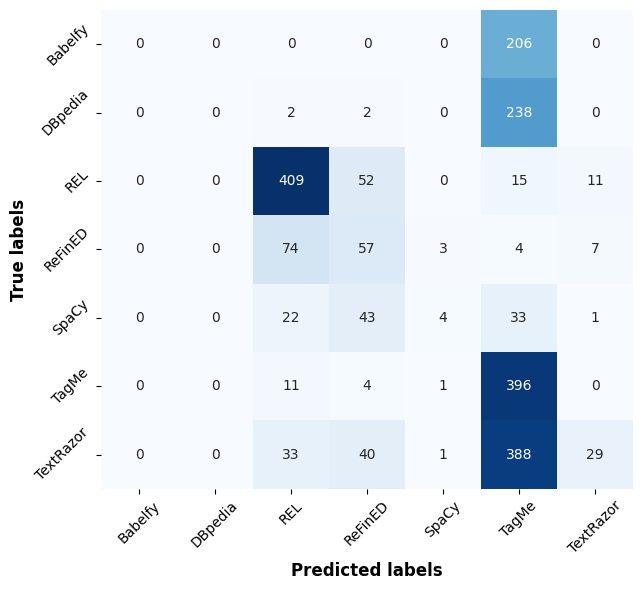

In [34]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")

In [35]:
def get_ds_name(idx):
    for ds in raw_text_labels_files:
        ds_name = ds['ds']
        ds = ds['raw']
        for _, value in ds.items():
            doc = value['doc']
            if doc_values[idx] == doc:
                return ds_name
    return None


In [36]:
ds_doc_topics = {}
for idx in idx_test:
    ds_name = get_ds_name(idx)
    if ds_name not in ds_doc_topics:
        ds_doc_topics[ds_name] = {}
        ds_doc_topics[ds_name]['doc'] = []
    document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[idx],reduced=True, num_topics=432897)
    ds_doc_topics[ds_name]['doc'].append({
        'text': doc_values[idx],
        'topics': document_topics,
        'scores': scores
    })

In [37]:
ds_doc_topics

{'/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/medmention/corpus_pubtator.json': {'doc': [{'text': "The ErbB3 receptor tyrosine kinase negatively regulates Paneth cells by PI3K - dependent suppression of Atoh1. Paneth cells (PCs), a secretory population located at the base of the intestinal crypt, support the intestinal stem cells (ISC) with growth factors and participate in innate immunity by releasing antimicrobial peptides, including lysozyme and defensins. PC dysfunction is associated with disorders such as Crohn's disease and necrotizing enterocolitis, but the specific pathways regulating PC development and function are not fully understood. Here we tested the role of the neuregulin receptor ErbB3 in control of PC differentiation and the ISC niche. Intestinal epithelial ErbB3 knockout caused precocious appearance of PCs as early as postnatal day 7, and substantially increased the number of mature PCs in adult mouse ileum. ErbB3 

In [38]:
def calculate_avgs(ds_doc_topics):
    for key, value in ds_doc_topics.items():
        topic_totals = {}
        topic_counts = {}

        value = value['doc']
        for sample in value:
            topics = sample['topics'][0]
            scores = sample['scores'][0]
            
            for topic, score in zip(topics, scores):
                if topic in topic_totals:
                    topic_totals[topic] += score
                    topic_counts[topic] += 1
                else:
                    topic_totals[topic] = score
                    topic_counts[topic] = 1

        topic_averages = {topic: topic_totals[topic] / topic_counts[topic] for topic in topic_totals}

        sorted_topics_total = sorted(topic_totals.items(), key=lambda item: item[1], reverse=True)
        sorted_topics_avg = sorted(topic_averages.items(), key=lambda item: item[1], reverse=True)
        ds_doc_topics[key]['topics'] = [f for f, _ in sorted_topics_total]
        ds_doc_topics[key]['avgs'] = [s if s > 0 else 0 for _, s in sorted_topics_avg]

In [39]:
calculate_avgs(ds_doc_topics=ds_doc_topics)

In [40]:
import random
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def plot_topics_vs(ds_doc_topics, title, y_offset, ncols):
    topics = topics_names_12_abbr 
    avgs_matrix = np.zeros((len(ds_doc_topics), len(topics)))

    sorted_ds = sorted(ds_doc_topics.keys())

    for i, label in enumerate(sorted_ds):
        data = ds_doc_topics[label]
        for j, topic_index in enumerate(data['topics']):
            avgs_matrix[i, topic_index] = data['avgs'][j]

    bar_sums = avgs_matrix.sum(axis=0)  

    normalized_avgs_matrix = avgs_matrix / bar_sums[np.newaxis, :] 

    normalized_avgs_matrix = np.nan_to_num(normalized_avgs_matrix)

    fig, ax = plt.subplots(figsize=(6, 6))

    bar_width = 0.8
    bottoms = np.zeros(len(topics))  

    for i, label in enumerate(sorted_ds):
        predefined_colors = {
            'Babelfy': '#FF6347',  
            'DBpediaSpotlight': '#4682B4',  
            'REL MD (.properties)': '#32CD32',
            'Refined MD (.properties)': '#FF8C00',
            'Spacy MD (.properties)': '#FF69B4',
            'TagMe': '#8A2BE2', 
            'TextRazor': '#00CED1', 
            'AIDA-YAGO2-dataset.tsv_nif': '#FF4500',
            'KORE_50_DBpedia.ttl': '#1E90FF', 
            'News-100.ttl': '#228B22',  
            'RSS-500.ttl': '#FF1493', 
            'Reuters-128.ttl': '#DC143C',  
            'corpus_pubtator.json': '#4B0082'
        }
        predefined_labels = {
            'Babelfy': 'Babelfy',  
            'DBpediaSpotlight': 'DBpedia',  
            'REL MD (.properties)': 'REL',
            'Refined MD (.properties)': 'ReFinED',
            'Spacy MD (.properties)': 'SpaCy',
            'TagMe': 'TagMe', 
            'TextRazor': 'TextRazor', 
            'AIDA-YAGO2-dataset.tsv_nif': 'AIDA CoNLL-YAGO',
            'KORE_50_DBpedia.ttl': 'KORE 50', 
            'News-100.ttl': 'News-100',  
            'RSS-500.ttl': 'RSS-500', 
            'Reuters-128.ttl': 'Reuters-128',  
            'corpus_pubtator.json': 'MedMention'
        }
        default_color = random_color()
        label = label.split('/')[-1]
        color = predefined_colors.get(label, default_color)

        ax.bar(topics, normalized_avgs_matrix[i], bar_width, bottom=bottoms, label=predefined_labels[label], color=color)
        bottoms += normalized_avgs_matrix[i]  

    ax.set_xlabel('Topics', fontsize=12, fontweight="bold")
    ax.set_ylabel('Normalized Topic Scores', fontsize=12, fontweight="bold")
    ax.set_title(title)
    plt.xticks(rotation=45, ha='right', fontsize=12)

    ax.legend(loc='lower left', bbox_to_anchor=(y_offset, 1), ncols=ncols)





    plt.tight_layout()
    plt.show()
    return fig

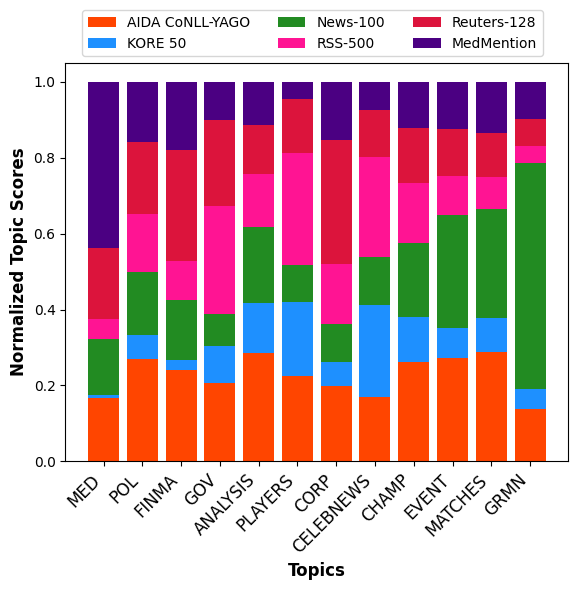

In [41]:
fig = plot_topics_vs(ds_doc_topics=ds_doc_topics, title="", ncols=3, y_offset=0.02)
fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")
# Test only DS vs Topics

In [42]:
label_encoder.classes_

array(['Babelfy', 'DBpediaSpotlight', 'REL MD (.properties)',
       'Refined MD (.properties)', 'Spacy MD (.properties)', 'TagMe',
       'TextRazor'], dtype='<U24')

In [43]:
def gen_pred_sys_doc_topics(test_predictions, idx_test, model):
    sys_doc_topics = {}
    if model == "gt":
        for model_idx, original_idx in enumerate(idx_test):
            system = label_encoder.classes_[test_predictions[model_idx]]
            if system not in ds_doc_topics:
                sys_doc_topics[system] = {}
                sys_doc_topics[system]['doc'] = []
            document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[original_idx],reduced=True, num_topics=432897)
            sys_doc_topics[system]['doc'].append({
                'text': doc_values[original_idx],
                'topics': document_topics,
                'scores': scores
            })
        return sys_doc_topics
        
    for model_idx, original_idx in enumerate(idx_test):
        system = label_encoder.classes_[test_predictions[model][model_idx]]
        if system not in ds_doc_topics:
            sys_doc_topics[system] = {}
            sys_doc_topics[system]['doc'] = []
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[original_idx],reduced=True, num_topics=432897)
        sys_doc_topics[system]['doc'].append({
            'text': doc_values[original_idx],
            'topics': document_topics,
            'scores': scores
        })
    return sys_doc_topics

In [44]:
sys_doc_topics_gt_test = gen_pred_sys_doc_topics(test_predictions=y_test, idx_test=idx_test, model='gt')
calculate_avgs(sys_doc_topics_gt_test)

In [45]:
sys_doc_topics_gt_test

{'TagMe': {'doc': [{'text': 'Reducing neuroinflammation by delivery of IL-10 encoding lentivirus from multiple-channel bridges. The spinal cord is unable to regenerate after injury largely due to growth-inhibition by an inflammatory response to the injury that fails to resolve, resulting in secondary damage and cell death. An approach that prevents inhibition by attenuating the inflammatory response and promoting its resolution through the transition of macrophages to anti-inflammatory phenotypes is essential for the creation of a growth permissive microenvironment. Viral gene delivery to induce the expression of anti-inflammatory factors provides the potential to provide localized delivery to alter the host inflammatory response. Initially, we investigated the effect of the biomaterial and viral components of the delivery system to influence the extent of cell infiltration and the phenotype of these cells. Bridge implantation reduces antigen -presenting cell infiltration at day 7, and

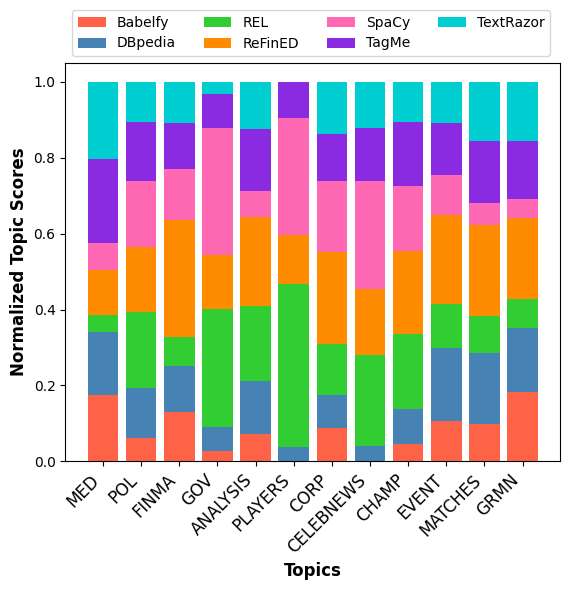

In [46]:
# GT TEST ONLY 
fig = plot_topics_vs(sys_doc_topics_gt_test, title="", y_offset=0, ncols=4)
fig.savefig("systems_gt_test_only.pdf", format="pdf", bbox_inches="tight")

In [47]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)

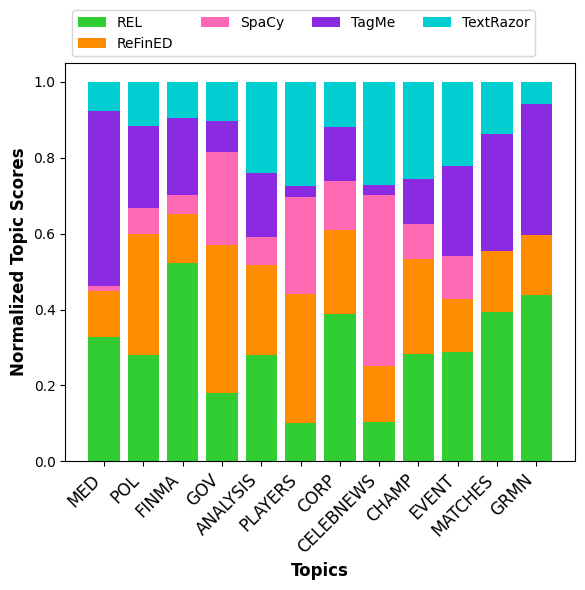

In [48]:
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("ohe.pdf", format="pdf", bbox_inches="tight")

In [49]:
# print("----------------- evaluate: combined one one encoding (noisy) ---------------------")
# combOneHot = evaluate(X_combined_one_hot, y)

In [50]:
# import pickle
# with open("combOneHot.pickle", "wb") as combOneHotFile:
#     pickle.dump(combOneHot, combOneHotFile)

In [51]:
import pickle
with open("combOneHot.pickle", "rb") as combOneHotFile:
    combOneHot= pickle.load(combOneHotFile)

In [52]:
results_dict['combOneHot'] = combOneHot[0]

In [53]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = combOneHot

In [54]:
result

{'dummy_mf': {'accuracy': 0.23537871524448706,
  'f1_w': 0.08969417864574555,
  'recall_w': 0.23537871524448706,
  'precision_w': 0.055403139590145326,
  'f1_ma': 0.0544376074061755,
  'recall_ma': 0.14285714285714285,
  'precision_ma': 0.033625530749212436,
  'f1_mi': 0.23537871524448706,
  'recall_mi': 0.23537871524448706,
  'precision_mi': 0.23537871524448706,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': 10, 'n_estimators': 50},
   'svm': {'C': 1, 'kernel': 'rbf'},
   'knn': {'n_neighbors': 7, 'p': 2},
   'mlp': {'activation': 'relu',
    'hidden_layer_sizes': (50,),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.13806327900287632,
  'f1_w': 0.1485579544949951,
  'recall_w': 0.13806327900287632,
  'precision_w': 0.17646130500079607,
  'f1_ma': 0.12756236485138267,
  'recall_ma': 0.13520506445332914,
  'precision_ma': 0.13859979765833044,
  'f1_mi': 0.13806327900287632,
  'recall_mi': 0.13806327900287632,
  'precision_mi': 0.138063279002

In [55]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.2224352828379674
recall@2 for    :dummy_mf is 0.43288590604026855
f1@2 for        :dummy_mf is 0.2938684131714478
precision@3 for :dummy_mf is 0.16858421220837216
recall@3 for    :dummy_mf is 0.48226270373921376
f1@3 for        :dummy_mf is 0.24983410382758067
precision@2 for :dummy_un is 0.2224352828379674
recall@2 for    :dummy_un is 0.43288590604026855
f1@2 for        :dummy_un is 0.2938684131714478
precision@3 for :dummy_un is 0.16858421220837216
recall@3 for    :dummy_un is 0.48226270373921376
f1@3 for        :dummy_un is 0.24983410382758067
precision@2 for :random_forest is 0.35426653883029724
recall@2 for    :random_forest is 0.6907957813998082
f1@2 for        :random_forest is 0.4683468646371177
precision@3 for :random_forest is 0.2908277404921696
recall@3 for    :random_forest is 0.8408437200383511
f1@3 for        :random_forest is 0.4321761001044329
precision@2 for :svm is 0.3700862895493768
recall@2 for    :svm is 0.7176414189837008
f1@2 for   

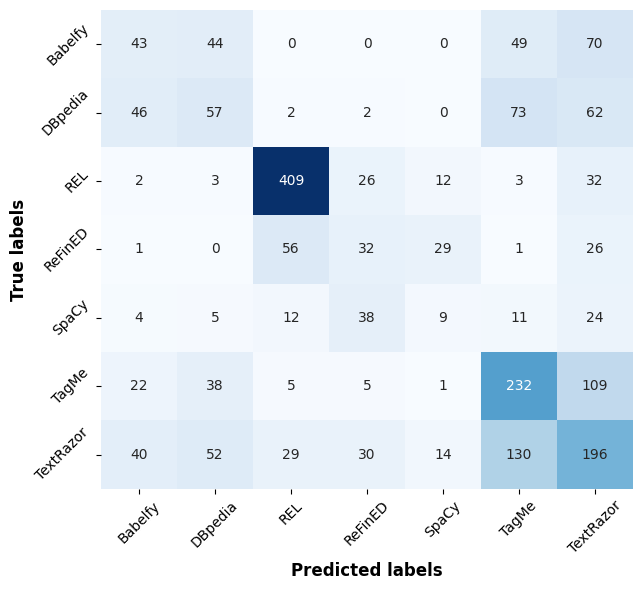

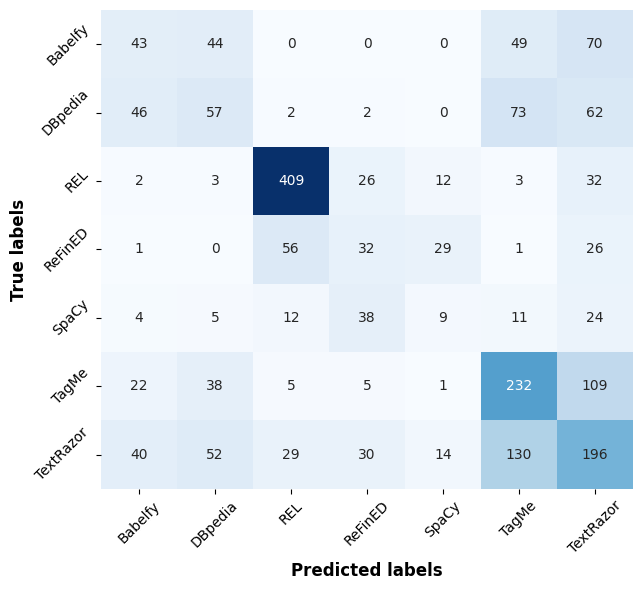

In [56]:
plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)

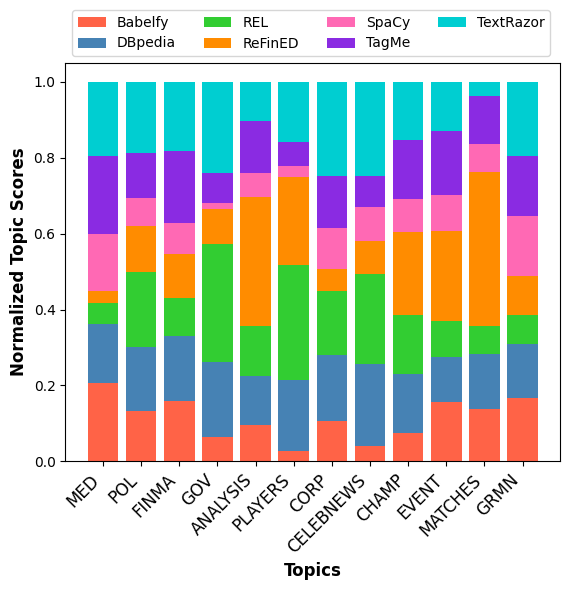

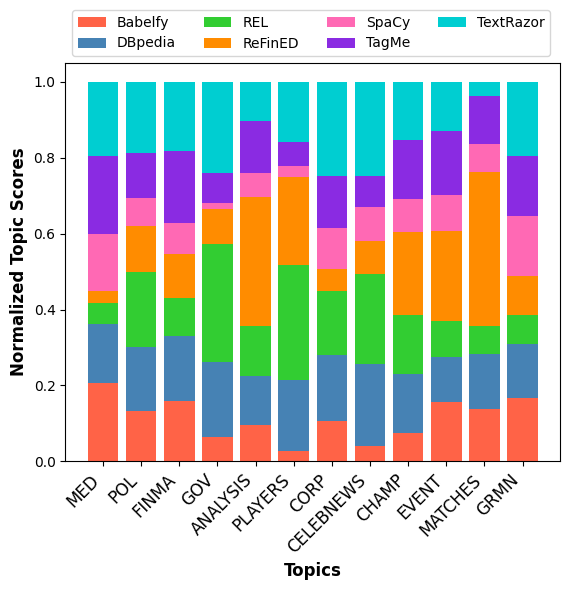

In [57]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model="mlp")
calculate_avgs(sys_doc_topics)
plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 

In [58]:
# print("----------------- evaluate: doc emb only ---------------------")

# docEmbOnly = evaluate(X_emb_only, y)


In [59]:
# import pickle
# with open("docEmbOnly.pickle", "wb") as docEmbOnlyFile:
#     pickle.dump(docEmbOnly, docEmbOnlyFile)

In [60]:
import pickle
with open("docEmbOnly.pickle", "rb") as docEmbOnlyFile:
    docEmbOnly= pickle.load(docEmbOnlyFile)

In [61]:
results_dict['docEmbOnly'] = docEmbOnly[0]

In [62]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = docEmbOnly

In [63]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.2224352828379674
recall@2 for    :dummy_mf is 0.43288590604026855
f1@2 for        :dummy_mf is 0.2938684131714478
precision@3 for :dummy_mf is 0.16858421220837216
recall@3 for    :dummy_mf is 0.48226270373921376
f1@3 for        :dummy_mf is 0.24983410382758067
precision@2 for :dummy_un is 0.2224352828379674
recall@2 for    :dummy_un is 0.43288590604026855
f1@2 for        :dummy_un is 0.2938684131714478
precision@3 for :dummy_un is 0.16858421220837216
recall@3 for    :dummy_un is 0.48226270373921376
f1@3 for        :dummy_un is 0.24983410382758067
precision@2 for :random_forest is 0.34995206136145734
recall@2 for    :random_forest is 0.6816874400767017
f1@2 for        :random_forest is 0.46248311455017876
precision@3 for :random_forest is 0.2925854905720677
recall@3 for    :random_forest is 0.8441994247363376
f1@3 for        :random_forest is 0.43455978259551126
precision@2 for :svm is 0.3717641418983701
recall@2 for    :svm is 0.7195589645254075
f1@2 for 

In [64]:
result

{'dummy_mf': {'accuracy': 0.23537871524448706,
  'f1_w': 0.08969417864574555,
  'recall_w': 0.23537871524448706,
  'precision_w': 0.055403139590145326,
  'f1_ma': 0.0544376074061755,
  'recall_ma': 0.14285714285714285,
  'precision_ma': 0.033625530749212436,
  'f1_mi': 0.23537871524448706,
  'recall_mi': 0.23537871524448706,
  'precision_mi': 0.23537871524448706,
  'best_params': {'dummy_mf': {},
   'dummy_un': {},
   'random_forest': {'max_depth': None, 'n_estimators': 200},
   'svm': {'C': 1, 'kernel': 'rbf'},
   'knn': {'n_neighbors': 7, 'p': 2},
   'mlp': {'activation': 'relu',
    'hidden_layer_sizes': (50,),
    'solver': 'sgd'}}},
 'dummy_un': {'accuracy': 0.1457334611697028,
  'f1_w': 0.15250298733115886,
  'recall_w': 0.1457334611697028,
  'precision_w': 0.17585339032773017,
  'f1_ma': 0.13785059996583396,
  'recall_ma': 0.14929764888743915,
  'precision_ma': 0.14458075729322165,
  'f1_mi': 0.1457334611697028,
  'recall_mi': 0.1457334611697028,
  'precision_mi': 0.145733461169

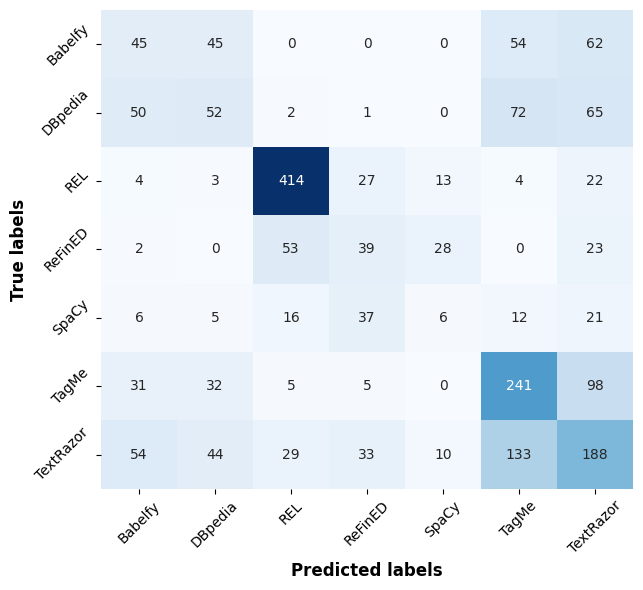

In [65]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
fig.savefig("CM_mlp_PCA.pdf", format="pdf", bbox_inches="tight")

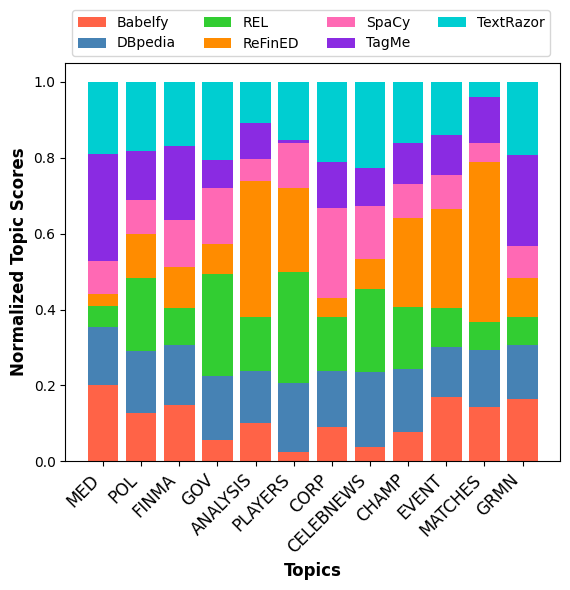

In [66]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("emb_only.pdf", format="pdf", bbox_inches="tight")

In [67]:
# print("----------------- evaluate: combined one one encoding (noisy) (PCA) ---------------------")
# oneHotPCA = evaluate(X_combined_one_hot_pca, y)

In [68]:
# import pickle
# with open("oneHotPCA.pickle", "wb") as oneHotPCAFile:
#     pickle.dump(oneHotPCA, oneHotPCAFile)

In [69]:
import pickle
with open("oneHotPCA.pickle", "rb") as oneHotPCAFile:
    oneHotPCA = pickle.load(oneHotPCAFile)

In [70]:

results_dict['oneHotPCA'] = oneHotPCA[0]

In [71]:
result, trainer, X_train, y_train, train_predictions, X_test, y_test, test_predictions, idx_train, idx_test = oneHotPCA

In [72]:
result["mlp"]

{'accuracy': 0.48034515819750717,
 'f1_w': 0.460973574581425,
 'recall_w': 0.48034515819750717,
 'precision_w': 0.45850407166281426,
 'f1_ma': 0.38276231395576615,
 'recall_ma': 0.38609878230746847,
 'precision_ma': 0.3992618457454428,
 'f1_mi': 0.48034515819750717,
 'recall_mi': 0.48034515819750717,
 'precision_mi': 0.48034515819750717,
 'best_params': {'dummy_mf': {},
  'dummy_un': {},
  'random_forest': {'max_depth': None, 'n_estimators': 200},
  'svm': {'C': 0.1, 'kernel': 'linear'},
  'knn': {'n_neighbors': 5, 'p': 1},
  'mlp': {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}}}

In [73]:
models = list(trainer.models.keys())

for model in models:
    for k in [2,3]:
        metrics_at_k(X_test, y_test, trainer, k=k, model=model)

precision@2 for :dummy_mf is 0.22195589645254074
recall@2 for    :dummy_mf is 0.43288590604026855
f1@2 for        :dummy_mf is 0.29344974304047483
precision@3 for :dummy_mf is 0.16794503036113667
recall@3 for    :dummy_mf is 0.48226270373921376
f1@3 for        :dummy_mf is 0.24913153188985562
precision@2 for :dummy_un is 0.22195589645254074
recall@2 for    :dummy_un is 0.43288590604026855
f1@2 for        :dummy_un is 0.29344974304047483
precision@3 for :dummy_un is 0.16794503036113667
recall@3 for    :dummy_un is 0.48226270373921376
f1@3 for        :dummy_un is 0.24913153188985562
precision@2 for :random_forest is 0.3480345158197507
recall@2 for    :random_forest is 0.6812080536912751
f1@2 for        :random_forest is 0.4606958984442159
precision@3 for :random_forest is 0.28699264940875596
recall@3 for    :random_forest is 0.8317353787152446
f1@3 for        :random_forest is 0.4267381060341596
precision@2 for :svm is 0.36864813039309685
recall@2 for    :svm is 0.7186001917545541
f1@2 f

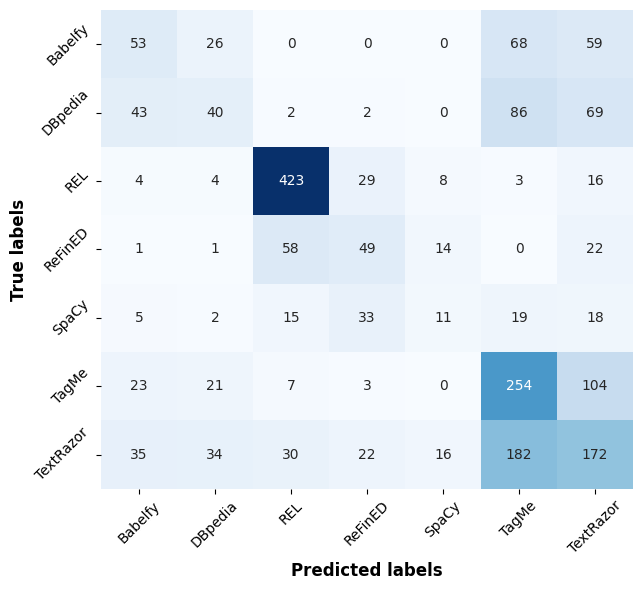

In [74]:
fig = plot_confusion_matrices(test_predictions=test_predictions, y_test=y_test)
fig.savefig("pca.pdf", format="pdf", bbox_inches="tight")

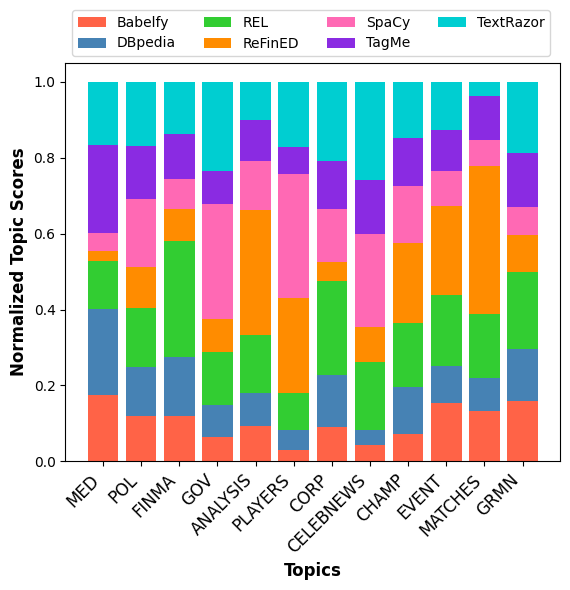

In [75]:
sys_doc_topics = gen_pred_sys_doc_topics(test_predictions=test_predictions, idx_test=idx_test, model='mlp')
calculate_avgs(sys_doc_topics)
fig = plot_topics_vs(sys_doc_topics,title="", y_offset=0, ncols=4) 
fig.savefig("pca.pdf", format="pdf", bbox_inches="tight")

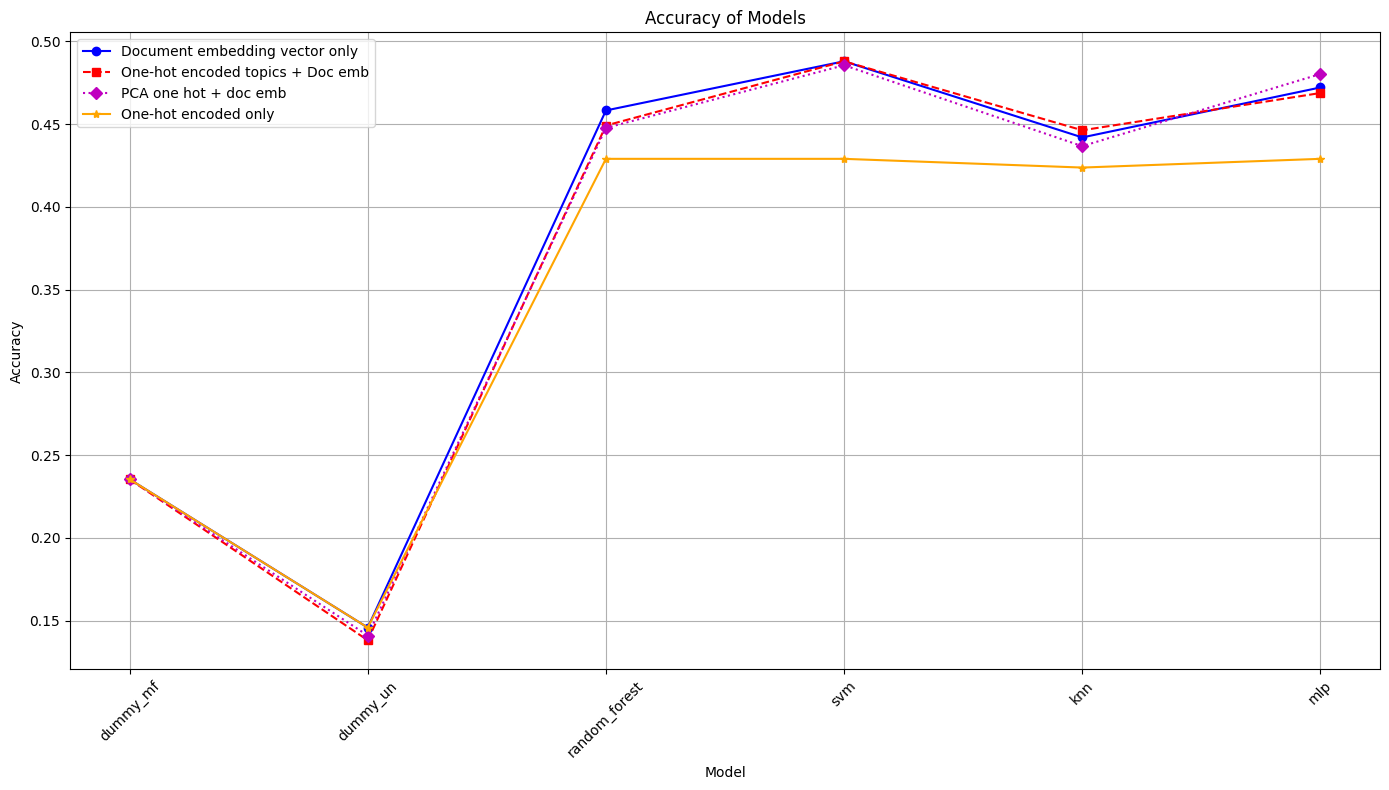

In [76]:

# Extracting model names
models = list(results_dict['docEmbOnly'].keys())

# Extracting accuracies for each method
accuracy_doc_emb = [results_dict['docEmbOnly'][model]['accuracy'] for model in models]
accuracy_one_hot = [results_dict['combOneHot'][model]['accuracy'] for model in models]
accuracy_pca_one_hot_doc_emb = [results_dict['oneHotPCA'][model]['accuracy'] for model in models]
accuracy_one_hot_only = [results_dict['oneHotOnly'][model]['accuracy'] for model in models]

# Plotting Accuracy
plt.figure(figsize=(14, 8))
plt.plot(models, accuracy_doc_emb, marker='o', color='b', linestyle='-', label='Document embedding vector only')
plt.plot(models, accuracy_one_hot, marker='s', color='r', linestyle='--', label='One-hot encoded topics + Doc emb')
plt.plot(models, accuracy_pca_one_hot_doc_emb, marker='D', color='m', linestyle=':', label='PCA one hot + doc emb')
plt.plot(models, accuracy_one_hot_only, marker='*', color='orange', linestyle='-', label='One-hot encoded only')
plt.xticks(rotation=45)
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [77]:
ds_doc = {}
for ds in raw_text_labels_files:
    ds_doc[ds['ds']] = []
    for key, value in ds['raw'].items():
        ds_doc[ds['ds']].append(value['doc'])


In [78]:
ds_doc['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']

['Allen founded the EMP in Seattle, which featured exhibitions about Hendrix and Dylan, but also about various science fiction movies.',
 'City won 3:2 against the Spurs.',
 'Atletico has beaten its archrival Real.',
 'Thomas and Mario are strikers playing in Munich.',
 'Karl and Theo made their extreme fortunes selling low-price groceries.',
 'The Sun and The Times reported that Greece will have to leave the Euro soon.',
 'Tiger lost the US Open.',
 'Three of the greatest guitarists started their career in a single band : Clapton, Beck, and Page.',
 'Angelina, her father Jon, and her partner Brad never played together in the same movie.',
 'Justin, Stefani, and Kate are among the most popular people on both MTV and Twitter.',
 'Dylan performed Hurricane about the black fighter Carter, from his album Desire.',
 'The Enola Gay bombed Hiroshima at the end of Second World War.\ufeff',
 'David and Victoria added spice to their marriage.',
 'Jobs and Baez dated in the late 1970s, and she pe

In [79]:
def get_doc_id(text):
    for idx, doc in enumerate(doc_values):
        if doc == text:
            return idx
    return -1


In [80]:
get_doc_id(ds_doc['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl'][0])

0

In [81]:
get_doc_id("Allen founded the EMP in Seattle, which featured exhibitions about Hendrix and Dylan, but also about various science fiction movies.")

0

In [82]:
ds_doc_topics_gt = {}
not_treated = 0
for ds_name, list_docs in ds_doc.items():
    ds_doc_topics_gt[ds_name] = {}
    ds_doc_topics_gt[ds_name]['doc'] = []
    for doc in list_docs:
        if get_doc_id(doc) == -1:
            not_treated += 1
            continue
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[get_doc_id(doc)],reduced=True, num_topics=432897)
        ds_doc_topics_gt[ds_name]['doc'].append({
            'text': doc,
            'topics': document_topics,
            'scores': scores
        })


In [83]:
ds_doc_topics_gt['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/medmention/corpus_pubtator.json']

{'doc': [{'text': 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis. Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been includ

In [84]:
print(scores)

[[ 0.60294163  0.28643078  0.19276917  0.1814571   0.16359335  0.16313358
   0.15452859  0.14576939  0.11753435  0.09742732  0.00785984 -0.0160108 ]]


In [85]:
ds_doc_topics['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/medmention/corpus_pubtator.json']['avgs']

[0.5895809134931557,
 0.28413725308115745,
 0.24208517215814984,
 0.22159491380675175,
 0.1647837661897774,
 0.1588740835687841,
 0.15212221807181045,
 0.13896091190614648,
 0.13771455546235628,
 0.11796894504609558,
 0.07497264478509535,
 0.04695925931863643]

In [86]:

print(ds_doc_topics['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']['topics'])
print(ds_doc_topics['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/KORE50/KORE_50_DBpedia.ttl']['avgs'])

[7, 5, 4, 8, 3, 9, 1, 6, 10, 11, 2, 0]
[0.24790032704671225, 0.20228942235310873, 0.17487721216110957, 0.1649863606407529, 0.11486126127697173, 0.10001482282366071, 0.09666894731067475, 0.09157728581201463, 0.09039204461233956, 0.07491740726289295, 0.042491765249343144, 0.011830559089070275]


In [87]:

print(ds_doc_topics['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/medmention/corpus_pubtator.json']['topics'])
print(ds_doc_topics['/local/users/unjde/analysis/analysis/analysis/combining_linking_techniques_analysis/data/datasets/medmention/corpus_pubtator.json']['avgs'])

[0, 2, 1, 6, 8, 9, 4, 10, 11, 3, 7, 5]
[0.5895809134931557, 0.28413725308115745, 0.24208517215814984, 0.22159491380675175, 0.1647837661897774, 0.1588740835687841, 0.15212221807181045, 0.13896091190614648, 0.13771455546235628, 0.11796894504609558, 0.07497264478509535, 0.04695925931863643]


In [88]:
topic_model.get_topics(num_topics=10)[0][7]

array(['wickets overs', 'wickets', 'waqar younis', 'five wickets',
       'wickets bowling', 'cricket england', 'wickets bat', 'wasim akram',
       'cricket pakistan', 'fall wickets', 'nine wickets',
       'overs cricket', 'cricket match', 'cricket australia',
       'england pakistan', 'first innings', 'cricket english', 'innings',
       'overs match', 'championship cricket', 'mohammad akram',
       'overs sri', 'second innings', 'pakistan beat', 'innings runs',
       'test series', 'cricket', 'khan pakistan', 'west indies',
       'saeed anwar', 'aamir sohail', 'lanka', 'pakistan oval',
       'hits innings', 'match australia', 'england captain', 'sri lankan',
       'seven innings', 'pakistan', 'overs', 'scoreless innings',
       'sri lanka', 'asif mujtaba', 'england beat', 'eight innings',
       'australia beat', 'inzamam ul', 'qualifying match', 'ian healy',
       'fall wicket'], dtype='<U27')

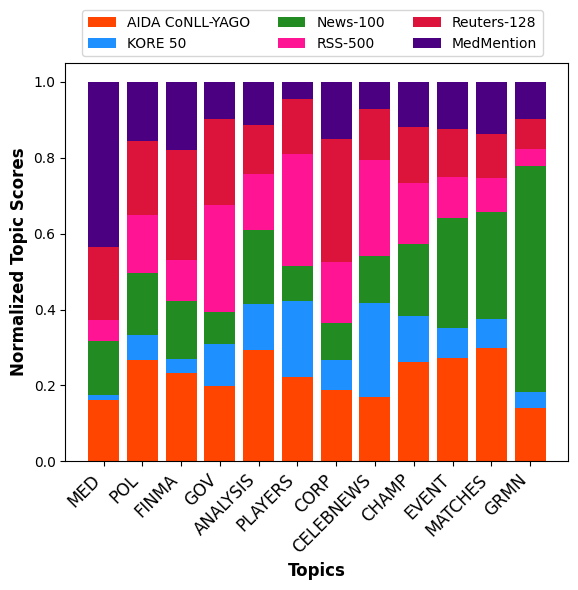

In [89]:
calculate_avgs(ds_doc_topics_gt)
fig = plot_topics_vs(ds_doc_topics_gt, y_offset=0.02, title='', ncols=3)
fig.savefig("topics_vs_datasets_ground_truth_all.pdf", format="pdf", bbox_inches="tight")

In [90]:
sys_doc_topics_gt = {}
not_treated = 0
for ds in raw_text_labels_files:
    ds = ds['raw']
    for key, doc_dict in ds.items():
        doc = doc_dict['doc']
        if get_doc_id(doc) == -1:
            not_treated += 1
            continue
        document_topics, scores, _, _ = topic_model.get_documents_topics(doc_ids=[get_doc_id(doc)],reduced=True, num_topics=432897)
        systems = [label['system'] for label in doc_dict['label']]
        for s in systems:
            if s not in sys_doc_topics_gt:
                sys_doc_topics_gt[s] = {}
                sys_doc_topics_gt[s]['doc'] = []
            sys_doc_topics_gt[s]['doc'].append({
                'text': doc,
                'topics': document_topics,
                'scores': scores
            })





In [91]:
sys_doc_topics_gt['Babelfy']

{'doc': [{'text': 'The Relationship Between Distance and Post-operative Visit Attendance Following Medical Male Circumcision in Nyanza Province, Kenya. To date, there is no research on voluntary medical male circumcision (VMMC) catchment areas or the relationship between distance to a VMMC facility and attendance at a post-operative follow-up visit. We analyzed data from a randomly selected subset of males self-seeking circumcision at one of 16 participating facilities in Nyanza Province, Kenya between 2008 and 2010. Among 1437 participants, 46.7 % attended follow-up. The median distance from residence to utilized facility was 2.98 km (IQR 1.31-5.38). Nearly all participants (98.8 %) lived within 5 km from a facility, however, 26.3 % visited a facility more than 5 km away. Stratified results demonstrated that among those utilizing fixed facilities, greater distance was associated with higher odds of follow-up non-attendance (OR 5.01-10km vs. 0-1km = 1.71, 95 % CI 1.08, 2.70, p = 0.02; 

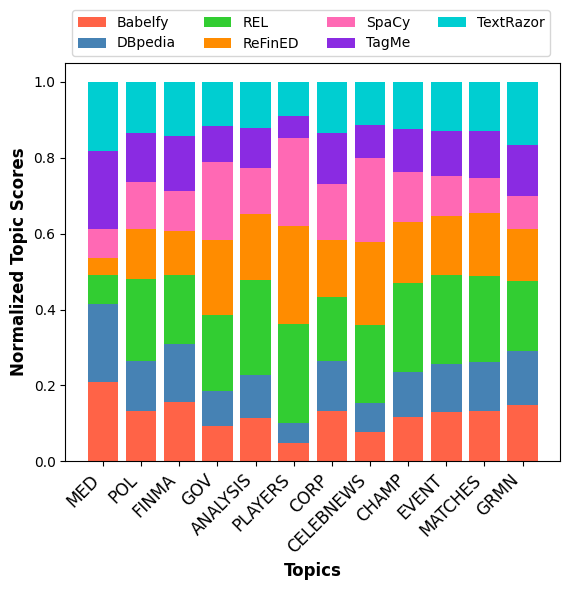

In [92]:
calculate_avgs(sys_doc_topics_gt)
fig = plot_topics_vs(sys_doc_topics_gt, title="", y_offset=-0.0, ncols=4)
fig.savefig("systems_vs_datasets_ground_truth_all.pdf", format="pdf", bbox_inches="tight")